 Project: Sentiment Analysis on Social Media Bangla Tweets

In this project we will classify the sentiment of a review either it is positive or negative. To do this, we have created a dataset of *5880* Social Media Tweets. In this dataset  *3016* reviews are annotated as Positive Sentiment and another *2864* reviews as negative sentiment. All the Reviews are collected from different social media platforms.  
Here, Negative Reviews are labled as 0 and Positive reviews as 1.

**Project Includes:**

-   Preprocessing 
-   Exploratory Analysis
-   Feature Extraction using TF-IDF for N-gram
-   Machine Learning Model Development
-   Evaluation Measure 
-   Saved the Final Model
-   Model Deployment

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
stopwords_list ='D:\\CSE 497\\497 Done S\\Dataset and Notebook\\Stopwords.txt'

## Importing the Dataset

In [3]:

data = pd.read_csv('D:\\CSE 497\\497 Done S\\Dataset and Notebook\\Original Data - Copy.csv' )


In [4]:
data

,Review,Sentiment
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,1
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,0
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,1
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,0
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,1
...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,0
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,1
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,0
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,1


In [5]:
data.sample(10)

,Review,Sentiment
3592,সেদিন এক মধ্য বয়স্ক পাগলীকে দেখেছিলাম রাস্তায...,1
3454,ক্যারিয়ারের ব্যর্থতা মানসিকভাবে দূর্বল করে দিয়...,1
5831,মেদিনীপুরের জনসভায় বক্তব্য রাখছেন মাননীয় মন্...,0
2751,কাগজের নৌকা কেউ বানিয়েছে তা চুপ চাপ ভাসিয়েছে...,0
3949,কখনো আয়নার সামনে দাঁড়িয়ে নিজের প্রেমে পড়েছ...,0
3545,গতকাল হুগলী জেলার রিষড়ার হেস্টিংস জুট মিলের শ...,0
5178,আকর্ষণীয় শ্লোগান আর ব্যানার নিয়ে ট্রাম্প বির...,1
3604,আমি অনেকদিন ধরেই বলে আসছি যে বিজেপি আর সংঘী রা...,1
227,কখনো জুয়া খেলবে না । পরিশ্রমলব্ধ সম্পদ ভোগ কর...,0
1122,মানসিক চাপ আর নিতে পারছি না,1


In [6]:
data.Sentiment = data.Sentiment.replace({1:'Positive',0:'Negative'})
print("Total Reviews:",len(data),
      "\nTotal Positive Reviews:",len(data[data.Sentiment =='Positive']),
      "\nTotal Negative Reviews:",len(data[data.Sentiment=='Negative']))

Total Reviews: 5880 
Total Positive Reviews: 3016 
Total Negative Reviews: 2864


In [7]:
print(data.dtypes)

Review       object
Sentiment    object
dtype: object


In [8]:
data

,Review,Sentiment
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive
...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive


In [9]:
# print some unprocessed reviews
sample_data = [17,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print(data.Review[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')  

গতকাল হুগলী জেলার রিষড়ার হেস্টিংস জুট মিলের শ্রমিকদের ট্রাস্টি বোর্ডের বিজেপির অসংগঠিত শ্রমিকদের সংগঠন পাকসু মোর্চা র প্রার্থীদের জয় প্রমান করল পশ্চিমবঙ্গের খেটে খাওয়া গরিব মানুষ আজ প্রধানমন্ত্রী শ্রী নরেন্দ্র মোদী জির পক্ষে । বিজয়ী প্রার্থীদের জানাই আন্তরিক গৈরিক শুভেচ্ছা  
 Sentiment:--  Negative 

পেঙ্গুইন যদি মন্ত্রী হয় ! তাহলে কাউয়া র দোষ কি ? সারাটা দিন ট্রমার মধ্যে গেছে , ভিডিও টা দেখার পর ঠিক থাকা অসম্ভব ছিল তখন । কি কপাল ছেলেমেয়ে গুলোর  
 Sentiment:--  Positive 

তোমাদের প্রতিযোগিতার ফলাফল হিসেবে আমরা আমাদের মৃত্যু মেনে নিয়েছি !  
 Sentiment:--  Positive 

আর ভালো লাগেনা যাইতে ইচ্ছা হয় না কিন্তু যেতে হবে সব রেডি কইরা দিছে বাড়িতে এত আদর সবাইকে মিস করবো  
 Sentiment:--  Positive 

আমি নাকি কুফা কোথাও যাইতে চাইলেই বৃষ্টি নামে 
 Sentiment:--  Positive 

বিয়ের প্রথম বছরঃ জানু দ্বিতীয় বছরঃওগো শুনছ ! তৃতীয় বছরঃকই গো তুমি চতুর্থ বছরঃ বল্টুর বাপ একটু এখানে আসো তো পঞ্চম বছরঃকোথায় মরছ ? ষষ্ঠ বছরঃ আজকে বাসায় আসো তোমার একদিন কি আমার একদিন ! তোমায় বিয়ে করে আমার জীবনটা তেজপা

## Data Processing 
This step includes removal of punctuation mark, numbers, emoji and stopwords from the reviews. We have used a helper functions for cleaning the corpus.
 

In [10]:
from utils import cleaned_reviews,stopwords_info,stopword_removal,process_reviews

In [11]:
# Apply the function into the dataframe
data['cleaned'] = data['Review'].apply(process_reviews,stopwords = stopwords_list,removing_stopwords = True)  

# print some cleaned reviews from the dataset
sample_data = [17,100,150,200,250,300,350,400,450,500,600,650,700,750,800]
for i in sample_data:
      print('Original:\n',data.Review[i],'\nCleaned:\n',data.cleaned[i],'\n','Sentiment:-- ',data.Sentiment[i],'\n')   

Original:
 গতকাল হুগলী জেলার রিষড়ার হেস্টিংস জুট মিলের শ্রমিকদের ট্রাস্টি বোর্ডের বিজেপির অসংগঠিত শ্রমিকদের সংগঠন পাকসু মোর্চা র প্রার্থীদের জয় প্রমান করল পশ্চিমবঙ্গের খেটে খাওয়া গরিব মানুষ আজ প্রধানমন্ত্রী শ্রী নরেন্দ্র মোদী জির পক্ষে । বিজয়ী প্রার্থীদের জানাই আন্তরিক গৈরিক শুভেচ্ছা  
Cleaned:
 গতকাল হুগলী জেলার রিষড়ার হেস্টিংস জুট মিলের শ্রমিকদের ট্রাস্টি বোর্ডের বিজেপির অসংগঠিত শ্রমিকদের সংগঠন পাকসু মোর্চা র প্রার্থীদের জয় প্রমান করল পশ্চিমবঙ্গের খেটে খাওয়া গরিব মানুষ আজ প্রধানমন্ত্রী শ্রী নরেন্দ্র মোদী জির পক্ষে বিজয়ী প্রার্থীদের জানাই আন্তরিক গৈরিক শুভেচ্ছা 
 Sentiment:--  Negative 

Original:
 পেঙ্গুইন যদি মন্ত্রী হয় ! তাহলে কাউয়া র দোষ কি ? সারাটা দিন ট্রমার মধ্যে গেছে , ভিডিও টা দেখার পর ঠিক থাকা অসম্ভব ছিল তখন । কি কপাল ছেলেমেয়ে গুলোর  
Cleaned:
 পেঙ্গুইন যদি মন্ত্রী হয় তাহলে কাউয়া র দোষ সারাটা দিন ট্রমার মধ্যে গেছে ভিডিও টা দেখার পর ঠিক থাকা অসম্ভব ছিল তখন কপাল ছেলেমেয়ে গুলোর 
 Sentiment:--  Positive 

Original:
 তোমাদের প্রতিযোগিতার ফলাফল হিসেবে আমরা আমাদের মৃত

In [12]:
data

,Review,Sentiment,cleaned
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...
...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...


In [13]:
data.cleaned.to_excel('clean_reviews.xlsx')

##### Processing of a sample review

In [14]:
tweet = 'যে মাঠে গান্ধী জি , রবীন্দ্রনাথ , নেতাজী স্পর্শ আছে , যে মাঠ বিপ্লবীদের স্পর্শে ধন্য'
stopwords_list ='D:\\CSE 497\\497 Done S\\Dataset and Notebook\\Stopwords.txt'
process_reviews(review = tweet, stopwords =stopwords_list,removing_stopwords=True)

'মাঠে গান্ধী জি রবীন্দ্রনাথ নেতাজী স্পর্শ আছে মাঠ বিপ্লবীদের স্পর্শে ধন্য'

## Dataset Summary

In [15]:
from utils import data_summary
documents,words,u_words,class_names = data_summary(data)


Class Name :  Positive
Number of Documents:3016
Number of Words:54032
Number of Unique Words:5059
Most Frequent Words:

না	1066
নেই	273
নাই	258
কিছু	251
আজ	234
করতে	232
কিন্তু	222
হবে	221
মানুষ	221
হয়	220

Class Name :  Negative
Number of Documents:2864
Number of Words:53108
Number of Unique Words:4781
Most Frequent Words:

না	669
হয়	345
হবে	249
মানুষ	229
আল্লাহ	180
ভালো	180
কিছু	179
কিন্তু	178
আমাদের	177
যায়	176


### Dataset Summary Visualization

In [16]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
print(df)

  Class Names         Category  Values
0    Positive  Total Documents    3016
1    Negative  Total Documents    2864
2    Positive      Total Words   54032
3    Negative      Total Words   53108
4    Positive     Unique Words    5059
5    Negative     Unique Words    4781


In [17]:
data

,Review,Sentiment,cleaned
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...
...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...


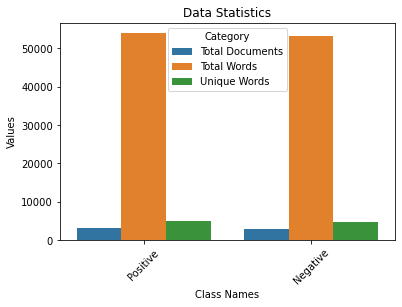

In [18]:
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);
plt.savefig('data_statistics.png',dpi = 600,bbox_inches = 'tight')

### Review Length Distribution

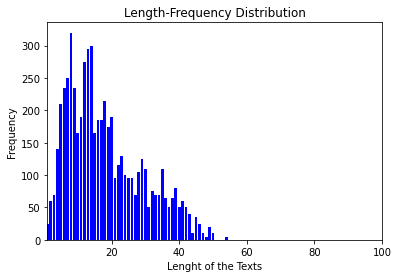

Maximum Length of a review: 54
Average Length of a reviews: 18.0


In [19]:
# Calculate the Review of each of the Review
data['ReviewLength'] = data.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in data.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 100)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.savefig('length_dist.png',dpi = 600,bbox_inches = 'tight')
plt.show()  
print(f"Maximum Length of a review: {max(data.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(data.ReviewLength),0)}")


### Save the cleaned data and stopwords into a pickle file

In [20]:
cleaned_data = pd.read_excel('clean_reviews.xlsx')
import pickle
# open a file, where you want to store the data
file = open('D:\\CSE 497\\497 Done S\\Dataset and Notebook\\Tweet_review_data.pkl', 'wb')

# dump information to that file
pickle.dump(cleaned_data, file)

In [21]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


In [22]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


In [23]:
stp = open(stopwords_list,'r', encoding='iso-8859-1').read().split()#encoding='utf-8').read().split()
# pickle stopwords
import pickle
# open a file, where you want to store the data
file = open('D:\\CSE 497\\497 Done S\\Dataset and Notebook\\Stopwords.pkl', 'wb')

# dump information to that file
pickle.dump(stp, file)

In [24]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


In [25]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


## Feature Extraction Using TF-IDF

In [26]:
from utils import calc_unigram_tfidf,calc_bigram_tfidf,calc_trigram_tfidf,show_tfidf

In [27]:
print(data.dtypes)

Review          object
Sentiment       object
cleaned         object
ReviewLength     int64
dtype: object


In [28]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


del data['Unnamed: 0']

In [29]:
data.cleaned=data.cleaned.astype(str)

In [30]:
print(data.dtypes)

Review          object
Sentiment       object
cleaned         object
ReviewLength     int64
dtype: object


In [31]:
tweet= 'যত ধৈর্য্য তত বেশি সফলতা । সমস্যা হলো আমাদের ধৈয্যধারন ক্ষমতা তুলো গোছের'
cv,feature_vector = calc_unigram_tfidf(data.cleaned)  
print("Shape of TF-IDF Corpus =====>",feature_vector.shape,'\n')
show_tfidf(cv,tweet)
#first_vector = tfidf.transform([samp_review]).toarray()

Shape of TF-IDF Corpus =====> (5880, 7826) 

Sample Review:  যত ধৈর্য্য তত বেশি সফলতা । সমস্যা হলো আমাদের ধৈয্যধারন ক্ষমতা তুলো গোছের
              tfidf
গোছের      0.354605
ধৈয্যধারন  0.354605
তুলো       0.354605
ধৈর্য্য    0.327355
তত         0.310510
সফলতা      0.310510
সমস্যা     0.268207
ক্ষমতা     0.258395
যত         0.250346
বেশি       0.212677
হলো        0.204005
আমাদের     0.185864
ঃ          0.000000


In [32]:
#help(calc_unigram_tfidf)

In [33]:
data

,Review,Sentiment,cleaned,ReviewLength
0,যে দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয...,Positive,দেশে মানুষের মৃত্যুর খবর শুনে মন্ত্রী মহোদয় হ...,40
1,জনগণের ভোট চুরি করে ক্ষমতায় আসা ওই নিয়ত আমাদ...,Negative,জনগণের ভোট চুরি ক্ষমতায় আসা ওই নিয়ত আমাদের ন...,28
2,নিকোটিনের ধোয়ায় সময় কাটে রাতে । রাতটা আমার ...,Positive,নিকোটিনের ধোয়ায় সময় কাটে রাতে রাতটা দিন দিন...,9
3,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,Negative,সবথেকে বড় যুদ্ধ হলো নিজের মনের সাথে যুদ্ধ আবেগ,9
4,কোন সিটিতেই কোন ভোট হিসেব হয়নি যা হচ্ছে হাসিন...,Positive,সিটিতেই ভোট হিসেব হয়নি যা হচ্ছে হাসিনার ইচ্ছে...,35
...,...,...,...,...
5875,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,Negative,সুন্দর দু টি বাক্য জ্ঞানী হও তবে অহংকারী হইও ন...,18
5876,আমি বুঝতে পারছি না যে আমার হৃদয় ভাঙার মানে কি...,Positive,বুঝতে পারছি না হৃদয় ভাঙার মানে বল,7
5877,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,Negative,আবারও তৃণমূলী দুস্কৃতিদের হাতে হত্যা হতে হলো ব...,23
5878,ঘুমের জন্য প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে ...,Positive,ঘুমের প্রস্তুত কিন্তু ঘুমের সমস্যা হচ্ছে নামই ...,8


In [34]:
X = data.drop('Sentiment', axis=1)
y = data['Sentiment']


## ML Model Development Using Unigram Feature

### Unigram Tf-idf Feature Extraction, Label Encoding and Splitting

In [35]:
from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
#X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

# Spliting train & test
X_train, X_test, y_train, y_test = train_test_split(feature_vector, lables, 
                                                    test_size=0.3, 
                                                    random_state=70,
                                                    shuffle=True)


### Model Defination

In [36]:
from utils import model_performace,ml_models_for_unigram_tfidf

## classifiers defination
ml_models,model_names = ml_models_for_unigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_unigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table  

In [37]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_unigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,96.83,96.90,96.90,96.90
DT,98.87,100.00,97.79,98.88
RF,98.70,99.66,97.79,98.71
MNB,97.62,97.05,98.34,97.69
KNN,95.86,97.05,94.80,95.91
Linear SVM,93.37,92.53,94.68,93.60
RBF SVM,95.41,94.67,96.46,95.56
SGD,98.13,98.01,98.34,98.18


In [38]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by DT at = 98.87
Highest F1-Score achieved by DT at = 98.88
Highest Precision Score achieved by DT at = 100.0
Highest Recall Score achieved by MNB at = 98.34


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


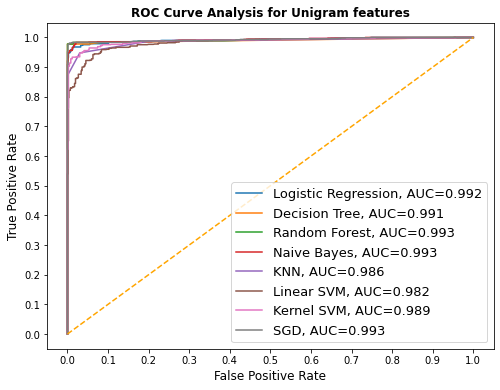

In [39]:
from utils import plot_roc_curve,ml_models_for_unigram_tfidf
## classifiers defination
gram_models = ml_models_for_unigram_tfidf() 

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

### Precision-Recall Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


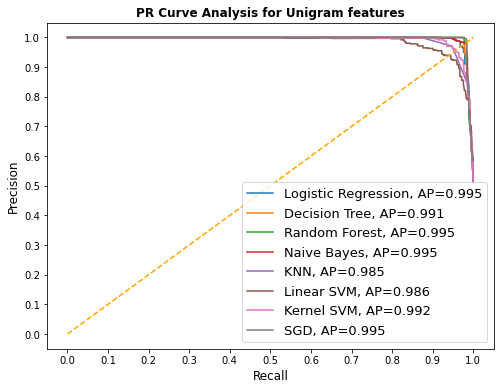

In [40]:
from utils import plot_PR_curve,ml_models_for_unigram_tfidf

gram_models = ml_models_for_unigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Unigram')

## Model Development Using Bigram Feature

### Bi-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [41]:
from utils import label_encoding,dataset_split
from utils import calc_bigram_tfidf

# calculate the Bigram Tf-idf feature
cv,feature_vector = calc_bigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
#X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

# Spliting train & test
X_train, X_test, y_train, y_test = train_test_split(feature_vector, lables, 
                                                    test_size=0.3, 
                                                    random_state=70,
                                                    shuffle=True)


### Model Defination

In [42]:
from utils import model_performace,ml_models_for_bigram_tfidf
                
# Classifiers Defination
ml_models,model_names = ml_models_for_bigram_tfidf() 

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_bigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table

In [43]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_bigram.json'))
table = performance_table(accuracy)
table

,Accuracy,Precision,Recall,F1 Score
LR,98.53,98.78,98.34,98.56
DT,98.58,99.44,97.79,98.60
RF,98.53,98.78,98.34,98.56
MNB,98.19,98.66,97.79,98.22
KNN,97.79,100.00,95.68,97.79
Linear SVM,98.07,98.33,97.90,98.11
RBF SVM,97.96,98.11,97.90,98.00
SGD,98.81,99.33,98.34,98.83


In [44]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by SGD at = 98.81
Highest F1-Score achieved by SGD at = 98.83
Highest Precision Score achieved by KNN at = 100.0
Highest Recall Score achieved by LR at = 98.34


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


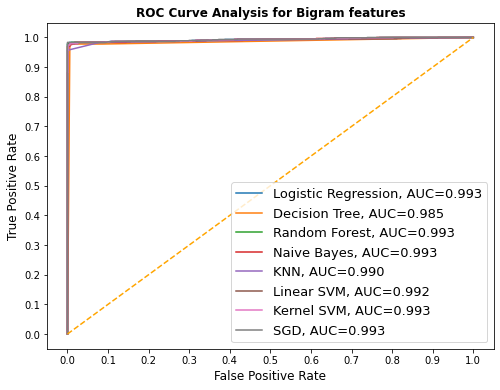

In [45]:
from utils import plot_roc_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Precision-Recall Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


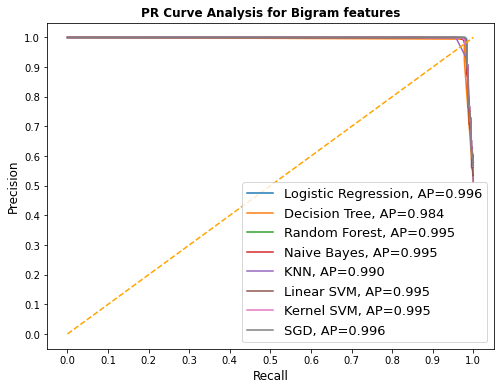

In [46]:
from utils import plot_PR_curve,ml_models_for_bigram_tfidf
## classifiers defination
gram_models = ml_models_for_bigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Bigram')

## Model Development Using Tri-gram Feature

### Tri-gram Tf-idf Feature Extraction, Label Encoding and Splitting

In [47]:
from utils import label_encoding,dataset_split
from utils import calc_trigram_tfidf

# calculate the Tri-gram Tf-idf feature
cv,feature_vector = calc_trigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
#X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

# Spliting train & test
X_train, X_test, y_train, y_test = train_test_split(feature_vector, lables, 
                                                    test_size=0.3, 
                                                    random_state=70,
                                                    shuffle=True)


### Model Defination

In [48]:
from utils import model_performace,ml_models_for_trigram_tfidf
            

# Classifiers Defination
ml_models,model_names = ml_models_for_trigram_tfidf()             

# call model accuracy function and save the metrices into a dictionary
accuracy = {f'{model_names[i]}':model_performace(model,X_train,X_test,y_train,y_test) for i,model in enumerate(ml_models)}
# Save the performance parameter into json file
with open('ml_performance_trigram.json', 'w') as f:
    json.dump(accuracy, f)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


### Performance Table

In [49]:
from utils import performance_table

# Load the json file
accuracy = json.load(open('ml_performance_trigram.json'))
table = performance_table(accuracy)
table


,Accuracy,Precision,Recall,F1 Score
LR,98.30,98.34,98.34,98.34
DT,98.87,99.44,98.34,98.89
RF,98.53,98.78,98.34,98.56
MNB,98.19,98.66,97.79,98.22
KNN,97.51,99.42,95.68,97.52
Linear SVM,98.24,98.23,98.34,98.28
RBF SVM,98.75,99.22,98.34,98.78
SGD,98.36,98.45,98.34,98.39


In [50]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")


Highest Accuracy achieved by DT at = 98.87
Highest F1-Score achieved by DT at = 98.89
Highest Precision Score achieved by DT at = 99.44
Highest Recall Score achieved by LR at = 98.34


### ROC Curve

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


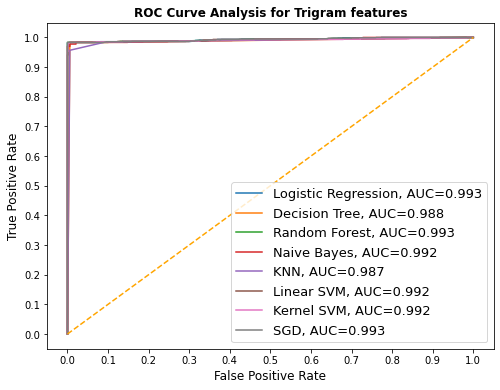

In [51]:
from utils import plot_roc_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_roc_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

### Precision-Recall

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


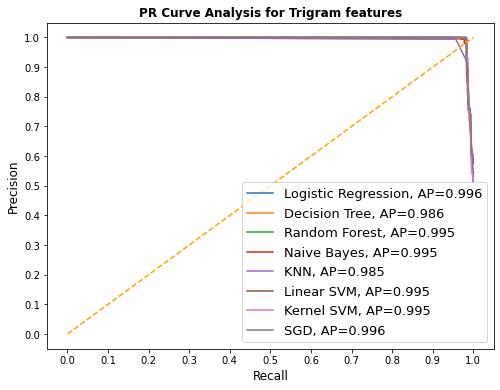

In [52]:
from utils import plot_PR_curve,ml_models_for_trigram_tfidf
## classifiers defination
gram_models = ml_models_for_trigram_tfidf()

plot_PR_curve(gram_models,X_train,X_test,y_train,y_test,'Trigram')

## Final Model

- Selected Feature: Unigram
- Selected Model : Multinomial Naive Bayes

In [53]:
from sklearn.naive_bayes import MultinomialNB

from utils import label_encoding,dataset_split
from utils import calc_unigram_tfidf

# calculate the Unigram Tf-idf feature
cv,feature_vector = calc_unigram_tfidf(data.cleaned) 
# Encode the labels
lables = label_encoding(data.Sentiment,False)
# Split the Feature into train and test set
#X_train,X_test,y_train,y_test = dataset_split(feature_space=feature_vector,sentiment=lables)

X_train, X_test, y_train, y_test = train_test_split(feature_vector, lables, 
                                                    test_size=0.3, 
                                                    random_state=70,
                                                    shuffle=True)


In [54]:
from sklearn.metrics import accuracy_score
mnb_model = MultinomialNB(alpha=0.15)
mnb_model.fit(X_train,y_train) 
y_pred = mnb_model.predict(X_test)
accuracy_score(y_true=y_test,y_pred=y_pred)*100

97.61904761904762

### Saved the model for reuse again

In [59]:
import pickle
# open a file, where you want to store the data
file = open('book_review_mnb.pkl', 'wb')

# dump information to that file
pickle.dump(mnb_model, file)

In [60]:
model = open('book_review_mnb.pkl','rb')
nb = pickle.load(model)

In [61]:
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9761904761904762